# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Explore the data and learn from it
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lib

## Read Data

In [2]:
train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")
test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")

# Desarrollo

## Funciones para descrbir el DF

## Descripción de DF de entrenamiento

In [3]:
lib.summarize_categoricals(train_df, show_levels=True)

,Levels,No. of Levels,No. of Missing Values
Customer,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1490,0
Age,"[33, 28, 31, 25, 26, 35, 27, 34, 32, 29, 30]",11,0
Employment Type,"[Private Sector/Self Employed, Government Sector]",2,0
GraduateOrNot,"[Yes, No]",2,0
AnnualIncome,"[550000, 800000, 1250000, 300000, 1350000, 400...",30,0
FamilyMembers,"[6, 7, 4, 3, 5, 2, 8, 9]",8,0
ChronicDiseases,"[0, 1]",2,0
FrequentFlyer,"[No, Yes]",2,0
EverTravelledAbroad,"[No, Yes]",2,0
TravelInsurance,"[1, 0]",2,0


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer,1490.0,745.500000,430.270264,1.0,373.25,745.5,1117.75,1490.0
Age,1490.0,29.667114,2.880994,25.0,28.00,29.0,32.00,35.0
AnnualIncome,1490.0,927818.791946,381171.545186,300000.0,600000.00,900000.0,1250000.00,1800000.0
FamilyMembers,1490.0,4.777181,1.640248,2.0,4.00,5.0,6.00,9.0
ChronicDiseases,1490.0,0.275839,0.447086,0.0,0.00,0.0,1.00,1.0
TravelInsurance,1490.0,0.357047,0.479290,0.0,0.00,0.0,1.00,1.0


In [5]:
to_cast = lib.return_categoricals(train_df, threshold=5)
train_df_cast = lib.to_categorical(to_cast, train_df)
train_df_cast = train_df_cast.drop(columns=["Customer"])

train_df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1490 non-null   int64   
 1   Employment Type      1490 non-null   category
 2   GraduateOrNot        1490 non-null   category
 3   AnnualIncome         1490 non-null   int64   
 4   FamilyMembers        1490 non-null   int64   
 5   ChronicDiseases      1490 non-null   category
 6   FrequentFlyer        1490 non-null   category
 7   EverTravelledAbroad  1490 non-null   category
 8   TravelInsurance      1490 non-null   category
dtypes: category(6), int64(3)
memory usage: 44.3 KB


## Correlación entre variables cuantitativas

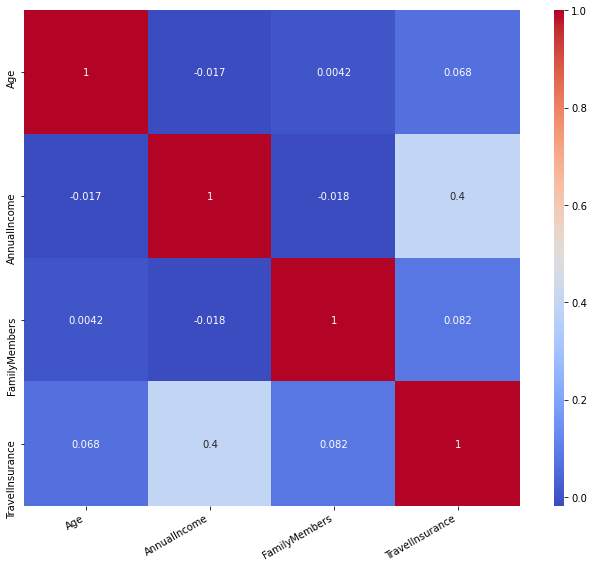

In [6]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=train_df_cast.astype({'TravelInsurance': 'int64'}).corr(),
            annot=True, cmap='coolwarm', cbar_kws={'aspect': 50},
            square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

**AnnualIncome** es la variable continua que más correlacionada esta con TraverlInsurance

## Correlación entre variables cualitativas

Funciones para armar matriz de correlación de variables caulitativas

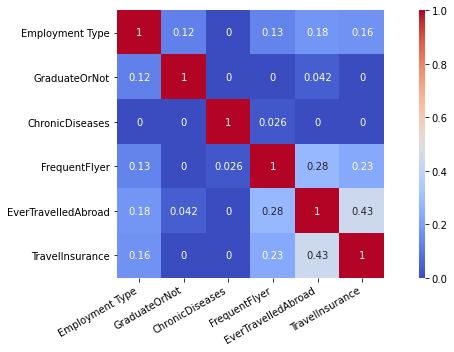

In [7]:
from scipy.stats import chi2_contingency

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(lib.categorical_corr_matrix(train_df_cast), annot=True, cmap='coolwarm', 
            cbar_kws={'aspect': 50}, square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

**EverTravelledAbroad, FrequentFlyer y Employment Type** son las variables categóricas más correlacionadas con TraverlInsurance

## Distribución de frecuencia de variables categóricas

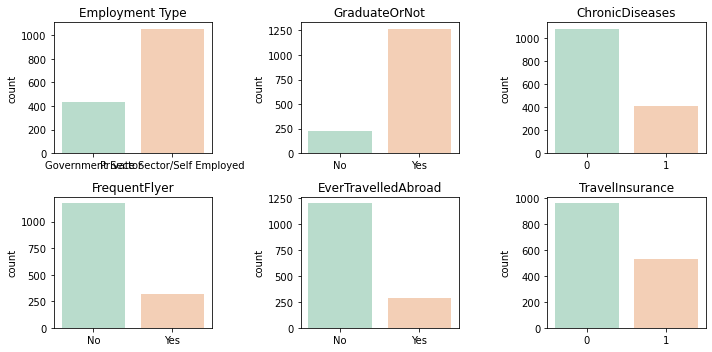

In [8]:
import pandas as pd

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
titles = list(train_df_cast.select_dtypes(include='category'))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.countplot(x=title, data=train_df_cast, palette='Pastel2', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')

plt.tight_layout()

## Distribución de frecuencia de variables continuas

['Age', 'AnnualIncome', 'FamilyMembers']


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

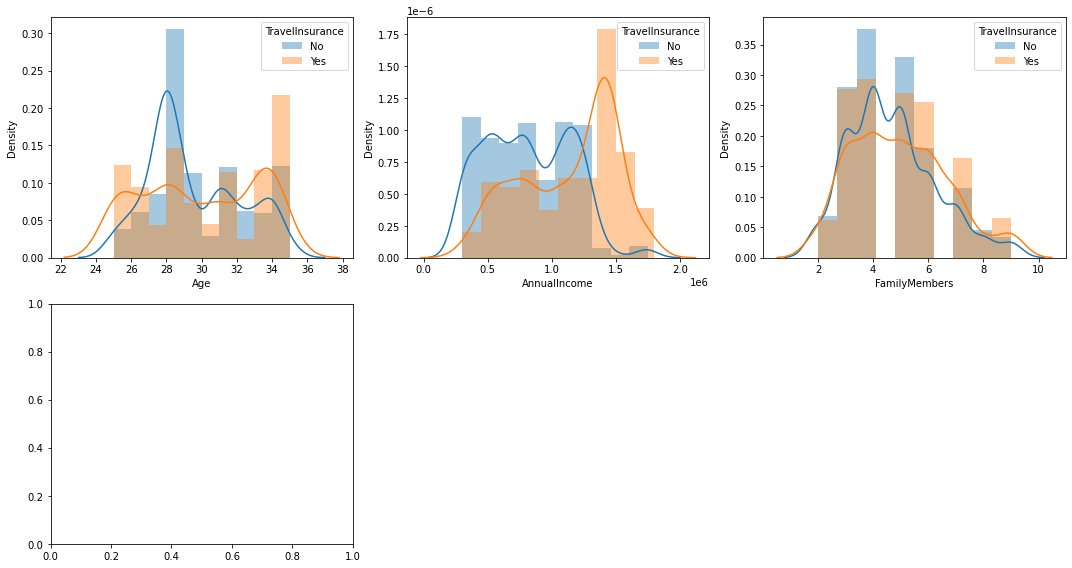

In [9]:
df_grouped = train_df_cast.groupby(by='TravelInsurance')
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
titles = list(train_df_cast.select_dtypes(exclude='category'))

print (titles)

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:

    sns.distplot(df_grouped.get_group(0)[title], bins=10, ax=ax, label='No')
    sns.distplot(df_grouped.get_group(1)[title], bins=10, ax=ax, label='Yes')
    ax.legend(title='TravelInsurance')

axs.flat[-1].remove()
axs.flat[-2].remove()
fig.tight_layout()

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


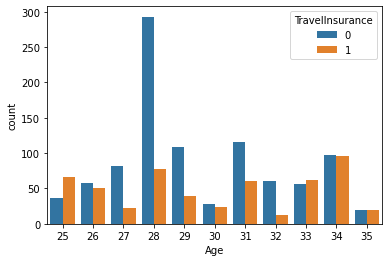

In [10]:
sns.countplot('Age',hue='TravelInsurance',data=train_df_cast)
plt.show()

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


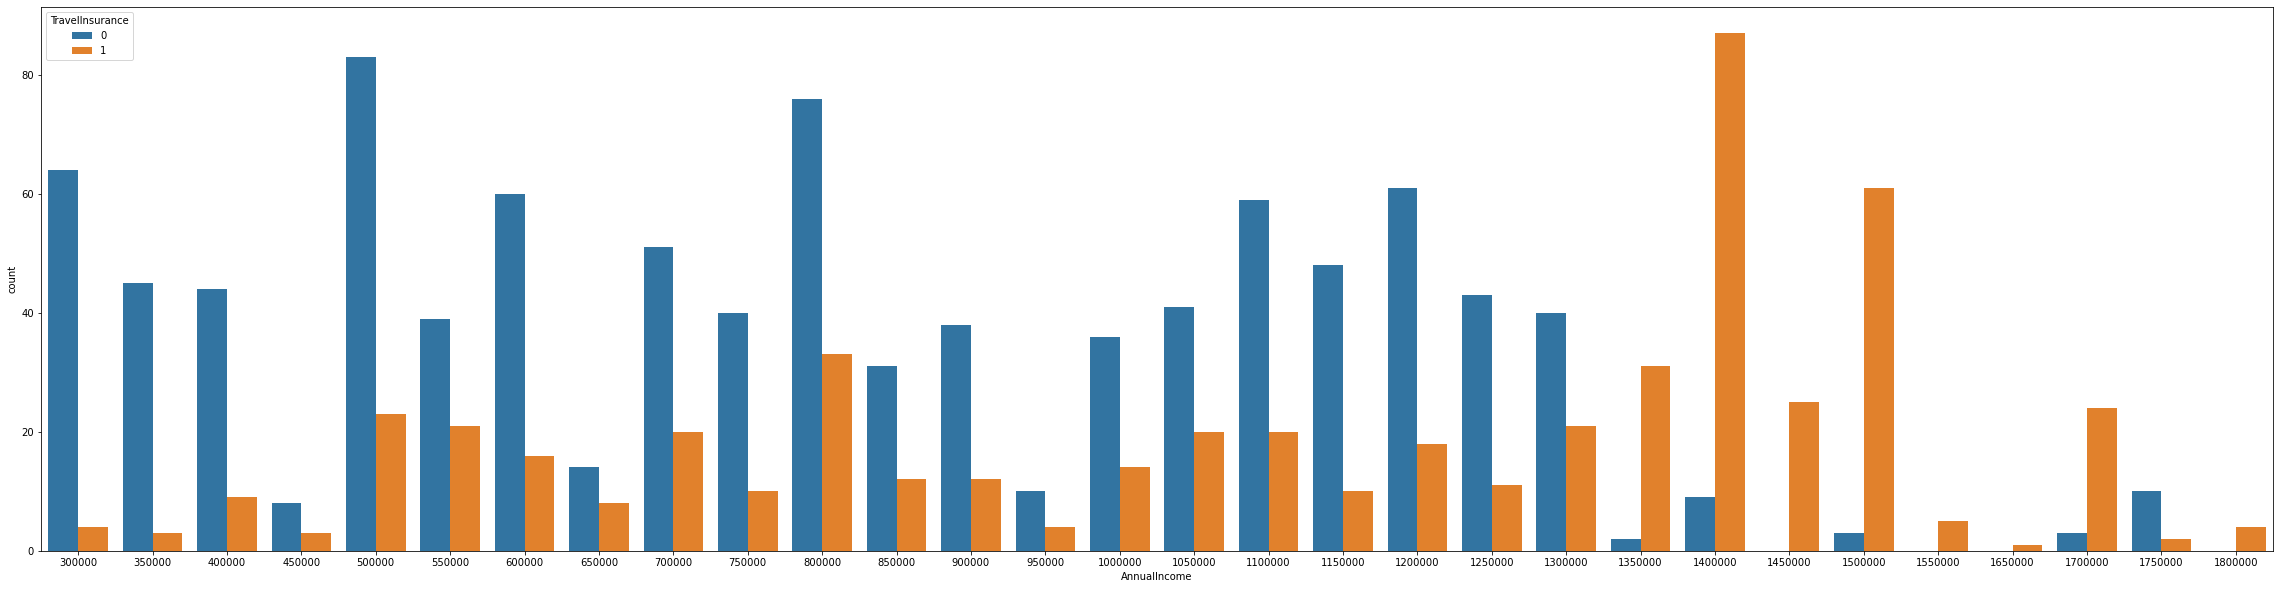

In [11]:
plt.figure(figsize=(40,10))
sns.countplot('AnnualIncome',hue='TravelInsurance',data=train_df_cast)
plt.show()

Se puede ver que cuando la persona gana 135 o más, contrata un seguro. 

## Observaciones 

- A mayor anual income, mayor grado de compra de seguros
- A mayor edad, mayor grado de compra de seguros

Conteo de TravelInsurance  en base a  EverTravelledAbroad, FrequentFlyer y Employment Type

Funciones para armar countpltot

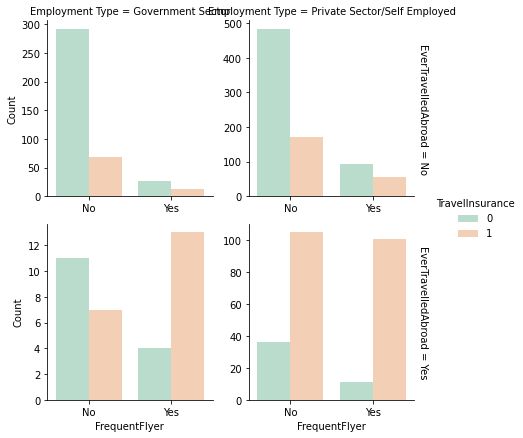

In [12]:
facet = sns.FacetGrid(train_df_cast, row='EverTravelledAbroad', col='Employment Type', sharex=False,
                      sharey=False, margin_titles=True)
facet.map(lib.modified_countplot, x='FrequentFlyer', hue='TravelInsurance',
          palette='Pastel2', facet_generator=facet.facet_data())
facet.set_xlabels('FrequentFlyer')
facet.set_ylabels('Count')
facet.add_legend(title='TravelInsurance');

## Observaciones: 

- EverTraveledAbroad y FrecuentTravelledAbroad = True, tienen gran peso a la hora de indicar si el viajero contrata seguro

In [13]:
#selected_numerical_columns = ['AnnualIncome' , 'Age']

selected_numerical_columns = ['AnnualIncome' , 'Age' , 'FamilyMembers' ]



In [14]:
#selected_categorical_columns = ['EverTravelledAbroad', 'FrequentFlyer']

selected_categorical_columns = ['EverTravelledAbroad', 'FrequentFlyer' , 'ChronicDiseases' , 'Employment Type' , 'GraduateOrNot']


## Seteo seed_val

Hacemos el seteo de la variable seed_val para que los experimentos puedan ser repetidos sin que los valore aleatorios cambien entre corrida y corrida


In [15]:
seed_val = 42

# Tecnicas de sampling

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/


https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets?scriptVersionId=1731010




No: 958
Yes: 532
Proportion: 1.8 : 1


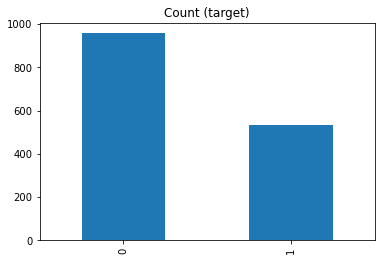

In [16]:
def plot_balance(train_df_cast):
    target_count = train_df_cast['TravelInsurance'].value_counts()
    print('No:', target_count[0])
    print('Yes:', target_count[1])
    print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
    
    target_count.plot(kind='bar', title='Count (target)');


plot_balance(train_df_cast)    


# Undersampling naive

In [17]:
count_class_0, count_class_1 = train_df_cast['TravelInsurance'].value_counts()

In [18]:
df_class_0 = train_df_cast[train_df_cast['TravelInsurance'] == 0]
df_class_1 = train_df_cast[train_df_cast['TravelInsurance'] == 1]

Hacemos un under sampling

In [19]:
df_class_0_under = df_class_0.sample(count_class_1)


In [20]:
df_class_0_under

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
235,25,Private Sector/Self Employed,No,1150000,5,0,No,No,0
1048,31,Private Sector/Self Employed,Yes,500000,4,1,No,No,0
101,32,Government Sector,Yes,850000,6,0,No,No,0
1010,28,Private Sector/Self Employed,Yes,500000,6,0,No,No,0
72,28,Private Sector/Self Employed,Yes,1200000,6,1,No,No,0
...,...,...,...,...,...,...,...,...,...
1328,32,Government Sector,Yes,800000,6,0,No,No,0
706,28,Government Sector,Yes,300000,3,0,No,No,0
291,28,Private Sector/Self Employed,Yes,900000,4,0,Yes,No,0
1392,28,Private Sector/Self Employed,Yes,550000,4,0,No,No,0


In [21]:
train_df_cast_under_naive = pd.concat([df_class_0_under ,df_class_1 ] , axis=0)
train_df_cast_under_naive

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
235,25,Private Sector/Self Employed,No,1150000,5,0,No,No,0
1048,31,Private Sector/Self Employed,Yes,500000,4,1,No,No,0
101,32,Government Sector,Yes,850000,6,0,No,No,0
1010,28,Private Sector/Self Employed,Yes,500000,6,0,No,No,0
72,28,Private Sector/Self Employed,Yes,1200000,6,1,No,No,0
...,...,...,...,...,...,...,...,...,...
1476,34,Private Sector/Self Employed,Yes,1000000,6,1,No,No,1
1477,30,Private Sector/Self Employed,No,650000,6,1,No,No,1
1480,25,Private Sector/Self Employed,Yes,1700000,5,0,Yes,No,1
1481,31,Government Sector,Yes,1500000,7,0,Yes,Yes,1


No: 532
Yes: 532
Proportion: 1.0 : 1


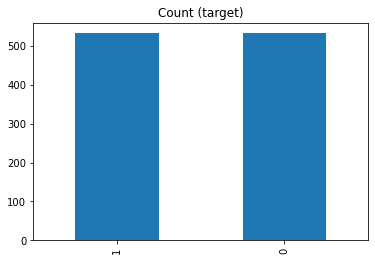

In [22]:


plot_balance(train_df_cast_under_naive)    


# Hacemos el oversampling

Instalamos SMOTE

In [23]:
#!conda install -y -c glemaitre imbalanced-learn
#!conda install -y six

In [24]:
#train_df_cast = train_df_cast_under_naive


## Particionamos el Data Set en train y test. 
Recordemos que el test que tenemos, no tiene los valores y puesto que justmente estos valores tiene que ser calculados y subidos a kaggle para ver como performa nuestro modelo

In [25]:
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

x_train_df_split, x_test_df_split, y_train_split, y_test_split = train_test_split(train_df_cast.drop(columns = ['TravelInsurance']), train_df_cast['TravelInsurance'], test_size=0.25, random_state=seed_val,
                               shuffle=True, stratify=train_df_cast['TravelInsurance'])

## Transformers

In [26]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ['AnnualIncome' , 'Age']),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
      ["Employment Type", "GraduateOrNot", "FamilyMembers", "FrequentFlyer", "EverTravelledAbroad"]),
    remainder="passthrough")

In [27]:
transformer_feature_engeneeirng = make_column_transformer(
    #(KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ['Age']),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
      ["Employment Type", "GraduateOrNot", "FamilyMembers", "FrequentFlyer", "EverTravelledAbroad"]),
    remainder="passthrough")

In [28]:
# Scalers

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
selected_transformer = transformer_feature_engeneeirng

In [31]:
x_train_df_split

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
598,33,Government Sector,Yes,400000,3,0,No,No
1466,33,Government Sector,Yes,600000,7,0,No,No
1365,33,Government Sector,Yes,650000,6,1,No,No
1158,28,Private Sector/Self Employed,Yes,600000,3,0,No,No
786,32,Government Sector,Yes,350000,6,0,No,No
...,...,...,...,...,...,...,...,...
191,28,Private Sector/Self Employed,Yes,1100000,7,0,Yes,No
1078,28,Private Sector/Self Employed,Yes,750000,4,0,No,No
531,28,Government Sector,Yes,300000,3,0,No,No
291,28,Private Sector/Self Employed,Yes,900000,4,0,Yes,No


Si se hace feature engeering, ejecutar el codigo siguiente

In [32]:



selected_numerical_columns = [ 'FamilyMembers' , 'Age' , 'AnnualIncome']
selected_categorical_columns = ['EverTravelledAbroad', 'FrequentFlyer' , 'ChronicDiseases' , 'Employment Type' , 'GraduateOrNot' ]


    

feature_engeenring = False

In [33]:


if feature_engeenring:
    
    selected_numerical_columns = [ 'FamilyMembers' ]
    selected_categorical_columns = ['EverTravelledAbroad', 'FrequentFlyer' , 'ChronicDiseases' , 'Employment Type' , 'GraduateOrNot' , 'Annual_Income_135' , 'Age_32']


    
    
    x_train_df_split['Annual_Income_135'] = x_train_df_split['AnnualIncome'] >= 1350000
    x_test_df_split['Annual_Income_135'] = x_test_df_split['AnnualIncome'] >= 1350000
    
    train_df['Annual_Income_135'] = train_df['AnnualIncome'] >= 1350000
  
    
    x_train_df_split['Age_32'] = x_train_df_split['Age'] >= 32
    x_test_df_split['Age_32'] = x_test_df_split['Age'] >= 32
    
    train_df['Age_32'] = train_df['Age'] >= 32
    
    
    x_train_df_split.drop(columns=["AnnualIncome" ,"Age"] , inplace = True)
    x_test_df_split.drop(columns=["AnnualIncome", "Age"] , inplace = True)
    train_df.drop(columns=["AnnualIncome" , "Age"] , inplace = True)
    
    
    

In [34]:



x_train_df_split_transformed = selected_transformer.fit_transform(x_train_df_split[selected_numerical_columns +  selected_categorical_columns])

x_test_df_cast_split_transformed = selected_transformer.transform(x_test_df_split[selected_numerical_columns +  selected_categorical_columns])

X_train_transformed = selected_transformer.transform(train_df[selected_numerical_columns +  selected_categorical_columns])


#x_train_df_split_transformed_scaled = sc.fit_transform(x_train_df_split_transformed)

#x_test_df_cast_split_transformed_scaled = sc.transform(x_test_df_cast_split_transformed)

#X_train_scaled = sc.fit_transform(X_train_transformed)



x_train_df_split_transformed_scaled = x_train_df_split_transformed

x_test_df_cast_split_transformed_scaled = x_test_df_cast_split_transformed

X_train_scaled = X_train_transformed





X_train = X_train_scaled

# Entrenamientos

Metrica para validar la eficiencia / eficacia de los modelos

In [35]:
from sklearn import metrics

primary_eval_metric = metrics.f1_score
feature_names = selected_numerical_columns +  selected_categorical_columns

Nombre de los lables Y

In [36]:
confusion_lbs = ['No TravelInsurance', 'TravelInsurance']

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

search_params1 = {
    'tol': [ 0.01 , 0.001 , 0.0001 , 0.1],
    'penalty': ['l2' , 'l1'],
    'solver': ['liblinear' , 'saga' ],
    'class_weight' : ['balanced']
}


search_params = {
    'tol': [ 0.0001 , 0.001 , 0.0001 , 0.1],
    'penalty': ['l2'],
    'solver': ['liblinear' , 'newton-cg', 'lbfgs', 'sag' ],
    'class_weight' : ['balanced']
}



lgr = LogisticRegression()

lgr_cv = GridSearchCV(estimator =  LogisticRegression(), param_grid = search_params, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

lgr_cv.fit(x_train_df_split_transformed, y_train_split)

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/coviedo/o

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag'],
                         'tol': [0.0001, 0.001, 0.0001, 0.1]},
             scoring='f1')

In [38]:
lgr_cv.best_estimator_

LogisticRegression(class_weight='balanced', solver='newton-cg')

LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=500, n_jobs=-1,
                     random_state=42, scoring='f1', solver='liblinear',
                     tol=0.1)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 1117 samples
 Test Size: 373 samples
---------------------------------------------
Training Time: 0.119 seconds
 Testing Time: 0.0 seconds
---------------------------------------------
Train Accuracy:  0.35720680393912263
 Test Accuracy:  0.35656836461126007
---------------------------------------------
Train F1 Score:  0.5263852242744064
 Test F1 Score:  0.525691699604743

---------------------------------------------
 Area Under ROC (test):  0.7324874686716791
---------------------------------------------
Model Memory Size: 10.02 kB

=============================> CLASSIFICATION REPORT <===================================
                    precision    recall  f1-score   support

No TravelInsurance       

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

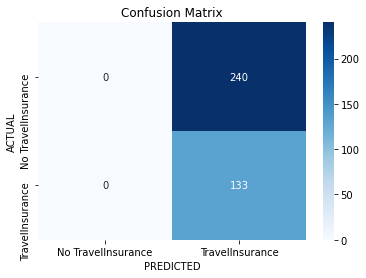

In [39]:
from sklearn.linear_model import LogisticRegressionCV

logit_cv = LogisticRegressionCV(class_weight='balanced', cv=5,
                                max_iter=500, penalty='l2',
                                scoring='f1', solver='liblinear',
                                n_jobs=-1, random_state=seed_val,
                                refit=True, tol=0.1, verbose=0)




logit_cv, logit_report = lib.report(logit_cv, x_train_df_split_transformed, y_train_split,
                                x_test_df_cast_split_transformed, y_test_split,
                                display_scores=[primary_eval_metric],
                                importance_plot=True,
                                feature_labels=feature_names,
                                confusion_labels=confusion_lbs)

In [40]:
#logit_cv = LogisticRegression(class_weight='balanced',
#                                max_iter=500, penalty='l2',
#                                solver='liblinear',
#                                n_jobs=-1, random_state=seed_val,
#                                tol=0.1, verbose=0)

logit_cv = LogisticRegression(class_weight='balanced', solver='liblinear', tol=0.1)

In [45]:
logit_cv.fit(x_train_df_split_transformed, y_train_split)
print(classification_report(y_train_split, logit_cv.predict(x_train_df_split_transformed)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       718
           1       0.36      1.00      0.53       399

    accuracy                           0.36      1117
   macro avg       0.18      0.50      0.26      1117
weighted avg       0.13      0.36      0.19      1117



/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Decission Tree

In [ ]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [6, 3, 10]
}

In [ ]:
tree_cv = GridSearchCV(estimator =  DecisionTreeClassifier(random_state=seed_val), param_grid = search_params, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

tree_cv.fit(x_train_df_split_transformed, y_train_split)


tree_cv.best_estimator_

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=10,
                                       random_state=seed_val, min_samples_leaf=5)

decision_tree, decision_tree_report = lib.report(decision_tree,x_train_df_split_transformed, y_train_split,
                                        x_test_df_cast_split_transformed, y_test_split,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)



In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=10,random_state=seed_val)

#decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2, random_state=42)

In [ ]:
decision_tree.fit(X_train, y_train)
print(classification_report(y_train, decision_tree.predict(X_train)))

# Decision Trees with Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier


In [ ]:
bagging_dtree = DecisionTreeClassifier(max_depth=10,
                                       random_state=seed_val, min_samples_leaf=5)

In [ ]:
bagging_clf = BaggingClassifier(base_estimator=bagging_dtree,
                                max_samples=0.745, n_estimators=100,
                                max_features=0.37,
                                n_jobs=-1, random_state=seed_val)

In [ ]:
bagging_clf, bagging_clf_report = lib.report(bagging_clf,x_train_df_split_transformed, y_train_split,
                                        x_test_df_cast_split_transformed, y_test_split,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)

## RandomForest

In [ ]:
[{1:neg_weight, 0:1} for neg_weight in np.arange(1.0, 5.0, 0.5)]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

search_params_rf = {
    'class_weight': ['balanced'],
    #'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)],
    #'class_weight': [{1:neg_weight, 0:1} for neg_weight in np.arange(1.0, 10.0, 0.5)],
    'max_depth' : [8,9],
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [100, 150, 200]
}



rf_cv = GridSearchCV(estimator =  RandomForestClassifier(random_state=seed_val), param_grid = search_params_rf, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

rf_cv.fit(x_train_df_split_transformed, y_train_split)

rf_cv.best_estimator_

In [ ]:
#rf = RandomForestClassifier(class_weight='balanced', max_depth=8, criterion='gini', random_state=seed_val)

rf = RandomForestClassifier(class_weight={0: 1, 1: 1.5}, criterion='entropy',max_depth=8, n_estimators=200, random_state=seed_val)




rf, rf_report = lib.report(rf,x_train_df_split_transformed, y_train_split,
                                        x_test_df_cast_split_transformed, y_test_split,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)

In [ ]:
rfc = RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=42)
#rfc = RandomForestClassifier(class_weight='balanced_subsample', max_depth=7, n_estimators=200, random_state=42)



#rfc = RandomForestClassifier(class_weight={0: 1, 1: 1.5}, criterion='entropy', max_depth=8, n_estimators=200, random_state=42)


In [42]:
rfc.fit(X_train, y_train)
print(classification_report(y_train, rfc.predict(X_train)))

NameError: name 'rfc' is not defined

## SVM

In [ ]:
from sklearn.svm import SVC

search_params_svc = {
    'C': [1,1.1,1.2],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [3,4,5],
    'class_weight' : [None,'balanced']
    
    
   }


svm_cv = GridSearchCV(estimator =  SVC(random_state = seed_val , probability = True), param_grid = search_params_svc, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

svm_cv.fit(x_train_df_split_transformed, y_train_split)

svm_cv.best_estimator_

In [ ]:
svc = SVC(C=1, degree=5, kernel='poly' ,class_weight='balanced' , random_state=seed_val , probability = True)

svc, svc_report = lib.report(svc,x_train_df_split_transformed, y_train_split,
                                        x_test_df_cast_split_transformed, y_test_split,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)

In [ ]:
svc = SVC(C=1.1, degree=4, kernel='poly' , random_state=seed_val , probability = True)
#svc = SVC(C=1, class_weight='balanced', degree=5, kernel='poly', probability=True,random_state=seed_val)


In [ ]:
rfc.fit(X_train, y_train)
print(classification_report(y_train, rfc.predict(X_train)))

## XGBoost

In [ ]:
# !conda install -y xgboost

https://github.com/fmfn/BayesianOptimization

In [ ]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight



search_params_xgbc = {
        'min_child_weight': [1, 5, 10],
        #'gamma': [0.5, 1, 1.5, 2, 5],
        #'subsample': [0.6, 0.8, 1.0],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate' :[0.02], 
        'n_estimators' : [600], 
        'objective' : ['binary:logistic']
    
         }


xgbc_cv = GridSearchCV(estimator =  XGBClassifier(), param_grid = search_params_xgbc, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

xgbc_cv.fit(x_train_df_split_transformed, y_train_split)

xgbc_cv.best_estimator_

In [ ]:
cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)
cls_weight

In [ ]:
xgb_clf = XGBClassifier(random_state=seed_val, n_jobs=-1 , scale_pos_weight=cls_weight )

#xgb_clf  =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
#              min_child_weight=1, monotone_constraints='()',
#              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
#              tree_method='exact', validate_parameters=1, verbosity=None)


xgb_clf.fit(X_train, y_train)

print(classification_report(y_train, xgb_clf.predict(X_train)))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

search_params_knn = {
    'n_neighbors': [3,4,5],
    'p': [ 2, 3, 4],
    'weights': ['distance']
}



knn_cv = GridSearchCV(estimator =  KNeighborsClassifier(), param_grid = search_params_knn, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

knn_cv.fit(x_train_df_split_transformed, y_train_split)

knn_cv.best_estimator_

In [ ]:
knn = KNeighborsClassifier(weights='distance')


nn, knn_report = lib.report(knn,x_train_df_split_transformed, y_train_split,
                                        x_test_df_cast_split_transformed, y_test_split,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)

In [ ]:
knn = KNeighborsClassifier(weights='distance')

In [ ]:
knn.fit(X_train, y_train)
print(classification_report(y_train, knn.predict(X_train)))

## Escalando

In [ ]:
knn_cv = GridSearchCV(estimator =  KNeighborsClassifier(), param_grid = search_params_knn, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

knn_cv.fit(x_train_df_split_transformed_scaled, y_train_split)

knn_cv.best_estimator_

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, p=3, weights='distance')

nn, knn_report = lib.report(knn,x_train_df_split_transformed_scaled, y_train_split,
                                        x_test_df_cast_split_transformed_scaled, y_test_split,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, p=3, weights='distance')

In [ ]:
knn.fit(X_train_scaled, y_train)
print(classification_report(y_train, knn.predict(X_train_scaled)))

In [ ]:
## Usando PCA

In [ ]:
search_params_knn = {
    'n_neighbors': [3,4,5,6,8,10],
    'p': [ 2, 3, 4],
    'weights': ['distance']
}




In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
x_train_df_split_transformed_scaled_pca = pca.fit_transform(x_train_df_split_transformed_scaled)
x_test_df_cast_split_transformed_scaled_pca = pca.transform(x_test_df_cast_split_transformed_scaled)


X_train_scaled_pca = pca.transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

In [ ]:
knn_cv = GridSearchCV(estimator =  KNeighborsClassifier(), param_grid = search_params_knn, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

knn_cv.fit(x_train_df_split_transformed_scaled_pca, y_train_split)

knn_cv.best_estimator_

In [ ]:
X_train_pca.shape

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance' , p = 4)

nn, knn_report = lib.report(knn,x_train_df_split_transformed_scaled_pca, y_train_split,
                                        x_test_df_cast_split_transformed_scaled_pca, y_test_split,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance' , p = 4)

In [ ]:
knn.fit(X_train_scaled_pca, y_train)
print(classification_report(y_train, knn.predict(X_train_scaled_pca)))